In [27]:
# Student ID: 1006842543
# Student Name: Sheng Zhang
# Student Email: eily.zhang@mail.utoronto.ca
# Instructor: Professor Shion Guha
# Course Code: INF2178
# Course Name: Experimental Design for Data Science
# Program: MI
# Faculty of Information
# University of Toronto

In [28]:
# Load the libraries to use in this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Load the data file
df = pd.read_excel("INF2178_A1_data.xlsx", sheet_name="data")
df


,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50939,2021-12-31,YWCA Toronto,14671,YWCA Davenport - Youth,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,20.0,6.0,NaN,NaN
50940,2021-12-31,Youth Without Shelter,12292,Youth without Shelter Emergency Shelter Program,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,23,Bed Based Capacity,23.0,23.0,NaN,NaN
50941,2021-12-31,Youth Without Shelter,12291,Youth without Shelter Stay In School Program,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,13,Bed Based Capacity,14.0,13.0,NaN,NaN
50942,2021-12-31,YouthLink,14891,YouthLink Emergency Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,10.0,10.0,NaN,NaN


In [29]:
# Only keep the columns that we are intereseted in
columns_to_keep = ["CAPACITY_TYPE", "PROGRAM_MODEL", "SERVICE_USER_COUNT", "CAPACITY_ACTUAL_BED", "OCCUPIED_BEDS", "CAPACITY_ACTUAL_ROOM", "OCCUPIED_ROOMS"]
df_new = df[columns_to_keep]
df_new

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0
1,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0
2,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0
3,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0
4,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0
...,...,...,...,...,...,...,...
50939,Bed Based Capacity,Emergency,6,20.0,6.0,NaN,NaN
50940,Bed Based Capacity,Emergency,23,23.0,23.0,NaN,NaN
50941,Bed Based Capacity,Transitional,13,14.0,13.0,NaN,NaN
50942,Bed Based Capacity,Emergency,10,10.0,10.0,NaN,NaN


In [30]:
# Since there are two types of capacity, create two separate dataframe for them
# Create the dataframe for room based capacity and drop the columns related to another type of capacity
df_RoomBased = df_new[df_new["CAPACITY_TYPE"] == "Room Based Capacity"]
df_RoomBased = df_RoomBased.drop(["CAPACITY_ACTUAL_BED", "OCCUPIED_BEDS"], axis=1)
df_RoomBased

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Room Based Capacity,Emergency,74,29.0,26.0
1,Room Based Capacity,Emergency,3,3.0,3.0
2,Room Based Capacity,Emergency,24,28.0,23.0
3,Room Based Capacity,Emergency,25,17.0,17.0
4,Room Based Capacity,Emergency,13,14.0,13.0
...,...,...,...,...,...
50920,Room Based Capacity,Emergency,128,128.0,128.0
50923,Room Based Capacity,Emergency,76,76.0,76.0
50927,Room Based Capacity,Emergency,10,3.0,3.0
50932,Room Based Capacity,Emergency,74,23.0,22.0


In [31]:
# Create the dataframe for bed based capacity and drop the columns related to another type of capacity
df_BedBased = df_new[df_new["CAPACITY_TYPE"] == "Bed Based Capacity"]
df_BedBased = df_BedBased.drop(["CAPACITY_ACTUAL_ROOM", "OCCUPIED_ROOMS"], axis=1)
df_BedBased

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS
5,Bed Based Capacity,Emergency,6,8.0,6.0
10,Bed Based Capacity,Emergency,22,24.0,22.0
11,Bed Based Capacity,Emergency,8,12.0,8.0
21,Bed Based Capacity,Transitional,10,12.0,10.0
25,Bed Based Capacity,Emergency,11,12.0,11.0
...,...,...,...,...,...
50939,Bed Based Capacity,Emergency,6,20.0,6.0
50940,Bed Based Capacity,Emergency,23,23.0,23.0
50941,Bed Based Capacity,Transitional,13,14.0,13.0
50942,Bed Based Capacity,Emergency,10,10.0,10.0


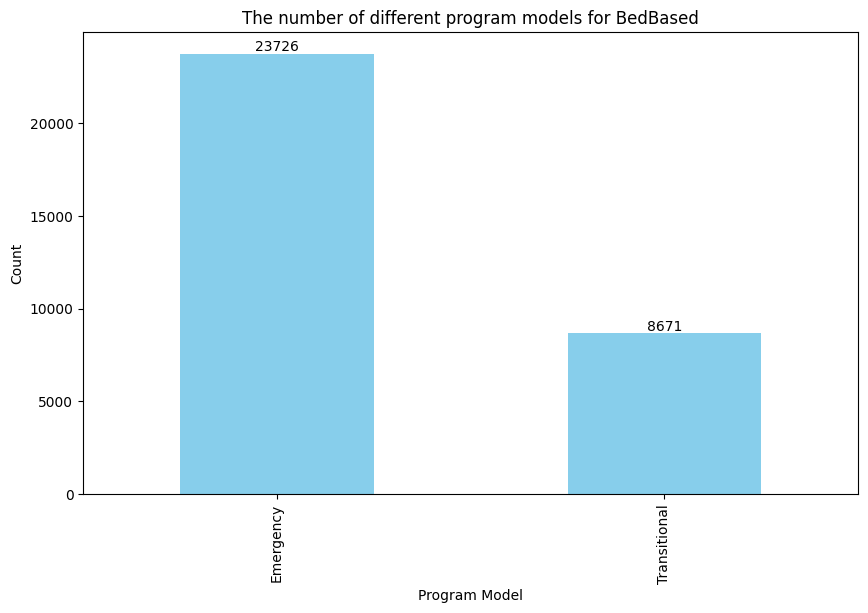

In [32]:
# Compare the number of different program models for df_BedBased
bed_program_model_counts = df_BedBased["PROGRAM_MODEL"].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
ax = bed_program_model_counts.plot(kind="bar", color="skyblue")

# Show the value at the top of the bars
for i, count in enumerate(bed_program_model_counts):
    ax.text(i, count + 0.1, str(count), ha="center", va="bottom")

plt.title("The number of different program models for BedBased")
plt.xlabel("Program Model")
plt.ylabel("Count")
plt.show()

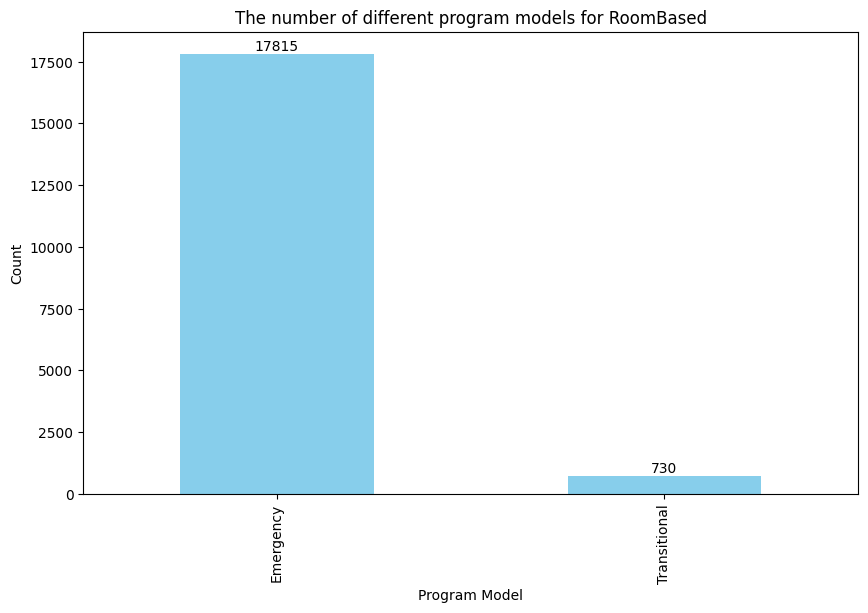

In [33]:
# Compare the number of different program models for df_RoomBased
room_program_model_counts = df_RoomBased["PROGRAM_MODEL"].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
ax = room_program_model_counts.plot(kind="bar", color="skyblue")

# Show the value at the top of the bars
for i, count in enumerate(room_program_model_counts):
    ax.text(i, count + 0.1, str(count), ha="center", va="bottom")

plt.title("The number of different program models for RoomBased")
plt.xlabel("Program Model")
plt.ylabel("Count")
plt.show()

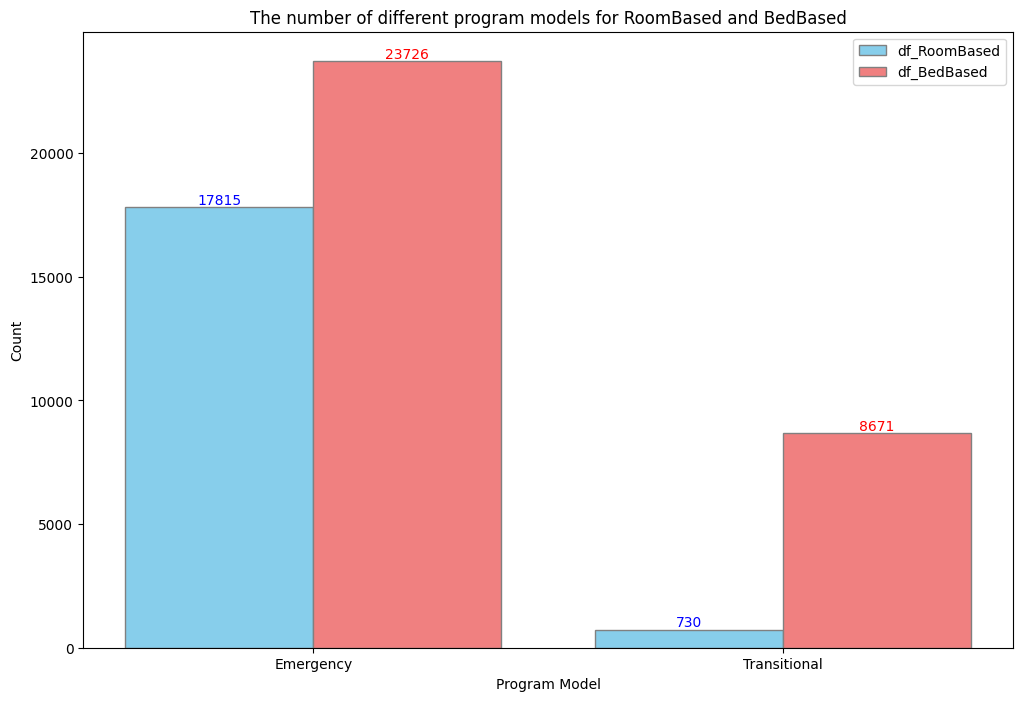

In [34]:
# Combine the two bargraphs above to compare the number of program models across different capacity type
combined_counts = room_program_model_counts.add(bed_program_model_counts, fill_value=0)

# Plot the combined bar graph with different colors
plt.figure(figsize=(12, 8))
bar_width = 0.4
r1 = np.arange(len(room_program_model_counts))
r2 = [x + bar_width for x in r1]
plt.bar(r1, room_program_model_counts, color="skyblue", width=bar_width, edgecolor="grey", label="df_RoomBased")
plt.bar(r2, bed_program_model_counts, color="lightcoral", width=bar_width, edgecolor="grey", label="df_BedBased")

# Show the values at the top of the bars
for i, count in enumerate(room_program_model_counts):
    plt.text(i, count + 0.1, str(count), ha="center", va="bottom", color="blue")
for i, count in enumerate(bed_program_model_counts):
    plt.text(i + bar_width, count + 0.1, str(count), ha="center", va="bottom", color="red")

plt.xticks([r + bar_width / 2 for r in range(len(combined_counts))], combined_counts.index)
plt.title("The number of different program models for RoomBased and BedBased")
plt.xlabel("Program Model")
plt.ylabel("Count")
plt.legend()
plt.show()

In [35]:
# Rename the columns and show the summary statistics for df_RoomBased
# Also add a new row for variance for the purpose of further t-test
df_RoomBased = df_RoomBased.rename(columns={"CAPACITY_ACTUAL_ROOM": "CAPACITY_ACTUAL", "OCCUPIED_ROOMS": "OCCUPIED"})
room_summary_stats = df_RoomBased.describe()
room_variance_row = pd.DataFrame(df_RoomBased.var(numeric_only=True), columns=["variance"]).T
room_summary_stats = pd.concat([room_summary_stats, room_variance_row])
room_summary_stats.index = room_summary_stats.index.rename("Summary Statistics for RoomBased")
room_summary_stats

,SERVICE_USER_COUNT,CAPACITY_ACTUAL,OCCUPIED
Summary Statistics for RoomBased,,,
count,18545.000000,18545.000000,18545.000000
mean,73.587166,55.549259,52.798598
std,73.319030,59.448805,58.792954
min,1.000000,1.000000,1.000000
25%,22.000000,19.000000,16.000000
50%,47.000000,35.000000,34.000000
75%,96.000000,68.000000,66.000000
max,339.000000,268.000000,268.000000
variance,5375.680185,3534.160443,3456.611452


In [36]:
# Renmae the columns and show the summary statistics for df_BedBased
# Also add a new row for variance for the purpose of further t-test
df_BedBased = df_BedBased.rename(columns={"CAPACITY_ACTUAL_BED": "CAPACITY_ACTUAL", "OCCUPIED_BEDS": "OCCUPIED"})
bed_summary_stats = df_BedBased.describe()
bed_variance_row = pd.DataFrame(df_BedBased.var(numeric_only=True), columns=["variance"]).T
bed_summary_stats = pd.concat([bed_summary_stats, bed_variance_row])
bed_summary_stats.index = bed_summary_stats.index.rename("Summary Statistics for BedBased")
bed_summary_stats

,SERVICE_USER_COUNT,CAPACITY_ACTUAL,OCCUPIED
Summary Statistics for BedBased,,,
count,32399.000000,32399.000000,32399.000000
mean,29.780271,31.627149,29.780271
std,26.379416,27.127682,26.379416
min,1.000000,1.000000,1.000000
25%,14.000000,15.000000,14.000000
50%,23.000000,25.000000,23.000000
75%,41.000000,43.000000,41.000000
max,234.000000,234.000000,234.000000
variance,695.873596,735.911104,695.873596


In [37]:
# Concatenate the dataframe for RoomBased and BedBased to plot the boxplots
df_combined = pd.concat([df_RoomBased, df_BedBased], keys=["RoomBased", "BedBased"])
df_combined

CAPACITY_TYPE PROGRAM_MODEL  SERVICE_USER_COUNT  \
RoomBased 0      Room Based Capacity     Emergency                  74   
          1      Room Based Capacity     Emergency                   3   
          2      Room Based Capacity     Emergency                  24   
          3      Room Based Capacity     Emergency                  25   
          4      Room Based Capacity     Emergency                  13   
...                              ...           ...                 ...   
BedBased  50939   Bed Based Capacity     Emergency                   6   
          50940   Bed Based Capacity     Emergency                  23   
          50941   Bed Based Capacity  Transitional                  13   
          50942   Bed Based Capacity     Emergency                  10   
          50943   Bed Based Capacity  Transitional                  29   

                 CAPACITY_ACTUAL  OCCUPIED  
RoomBased 0                 29.0      26.0  
          1                  3.0       3.0  
          2                 28.0      23.0  
          3                 17.0      17.0  
          4                 14.0      13.0  
...                          ...       ...  
BedBased  50939             20.0       6.0  
          50940             23.0      23.0  
          50941             14.0      13.0  
          50942             10.0      10.0  
          50943             29.0      29.0  

[50944 rows x 5 columns]

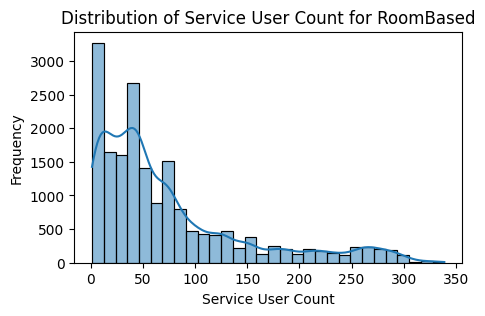

In [38]:
# Plot the histogram for the distribution of SERVICE_USER_COUNT in RoomBased
plt.figure(figsize=(5, 3))
sns.histplot(df_RoomBased["SERVICE_USER_COUNT"], bins=30, kde=True)
plt.title("Distribution of Service User Count for RoomBased")
plt.xlabel("Service User Count")
plt.ylabel("Frequency")
plt.show()

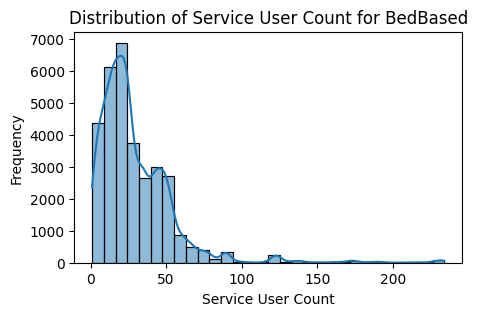

In [39]:
# Plot the histogram for the distribution of SERVICE_USER_COUNT in BedBased
plt.figure(figsize=(5, 3))
sns.histplot(df_BedBased["SERVICE_USER_COUNT"], bins=30, kde=True)
plt.title("Distribution of Service User Count for BedBased")
plt.xlabel("Service User Count")
plt.ylabel("Frequency")
plt.show()

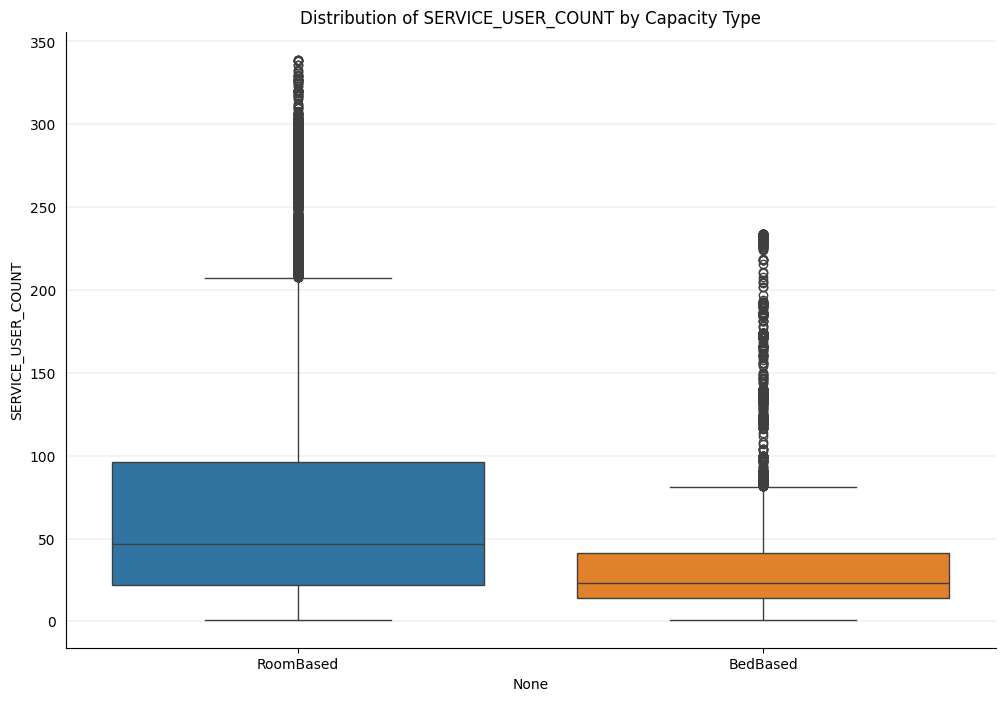

In [40]:
# Plot the multi-variable boxplot for the variable SERVICE_USER_COUNT

fig, ax = plt.subplots(figsize=(12, 8))
# Remove top and right border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position("none")

# Add major gridlines in the y-axis
ax.grid(color="grey", axis="y", linestyle="-", linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title("Distribution of SERVICE_USER_COUNT by Capacity Type")

# Create a boxplot for SERVICE_USER_COUNT
sns.boxplot(x=df_combined.index.get_level_values(0), y="SERVICE_USER_COUNT", data=df_combined, hue=df_combined.index.get_level_values(0), ax=ax)

# Show the plot
plt.show()


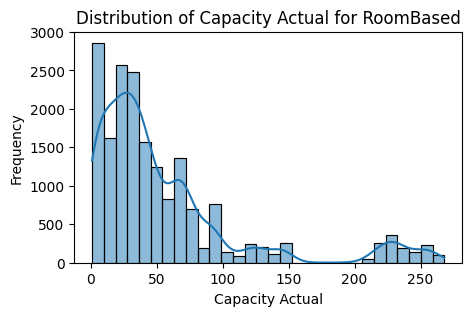

In [41]:
# Plot the histogram for the distribution of CAPACITY_ACTUAL in RoomBased
plt.figure(figsize=(5, 3))
sns.histplot(df_RoomBased["CAPACITY_ACTUAL"], bins=30, kde=True)
plt.title("Distribution of Capacity Actual for RoomBased")
plt.xlabel("Capacity Actual")
plt.ylabel("Frequency")
plt.show()

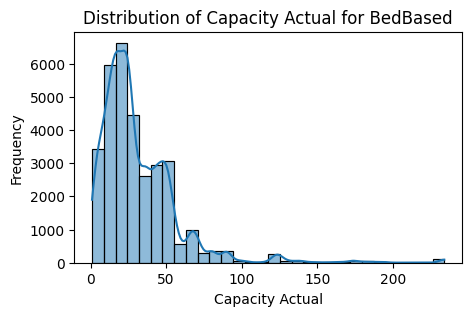

In [42]:
# Plot the histogram for the distribution of CAPACITY_ACTUAL in BedBased
plt.figure(figsize=(5, 3))
sns.histplot(df_BedBased["CAPACITY_ACTUAL"], bins=30, kde=True)
plt.title("Distribution of Capacity Actual for BedBased")
plt.xlabel("Capacity Actual")
plt.ylabel("Frequency")
plt.show()

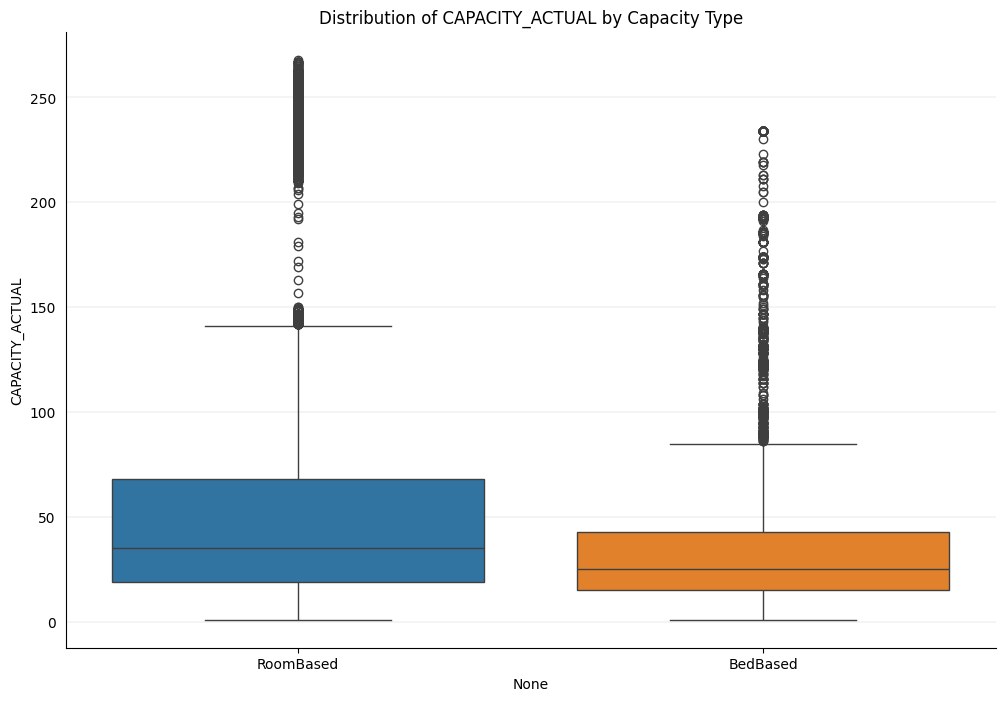

In [43]:
# Plot the multi-variable boxplot for the variable CAPACITY_ACTUAL

fig, ax = plt.subplots(figsize=(12, 8))
# Remove top and right border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position("none")

# Add major gridlines in the y-axis
ax.grid(color="grey", axis="y", linestyle="-", linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title("Distribution of CAPACITY_ACTUAL by Capacity Type")

# Create a boxplot for CAPACITY_ACTUAL
sns.boxplot(x=df_combined.index.get_level_values(0), y="CAPACITY_ACTUAL", data=df_combined, hue=df_combined.index.get_level_values(0), ax=ax)

# Show the plot
plt.show()


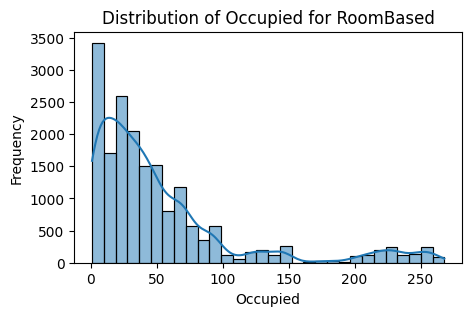

In [44]:
# Plot the histogram for the distribution of OCCUPIED in RoomBased
plt.figure(figsize=(5, 3))
sns.histplot(df_RoomBased["OCCUPIED"], bins=30, kde=True)
plt.title("Distribution of Occupied for RoomBased")
plt.xlabel("Occupied")
plt.ylabel("Frequency")
plt.show()

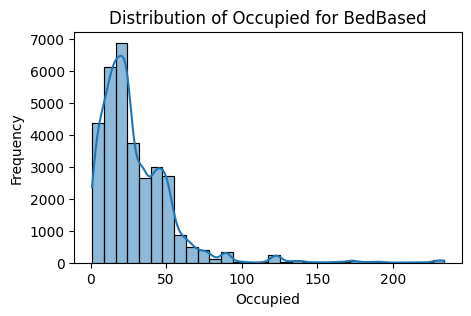

In [45]:
# Plot the histogram for the distribution of OCCUPIED in BedBased
plt.figure(figsize=(5, 3))
sns.histplot(df_BedBased["OCCUPIED"], bins=30, kde=True)
plt.title("Distribution of Occupied for BedBased")
plt.xlabel("Occupied")
plt.ylabel("Frequency")
plt.show()

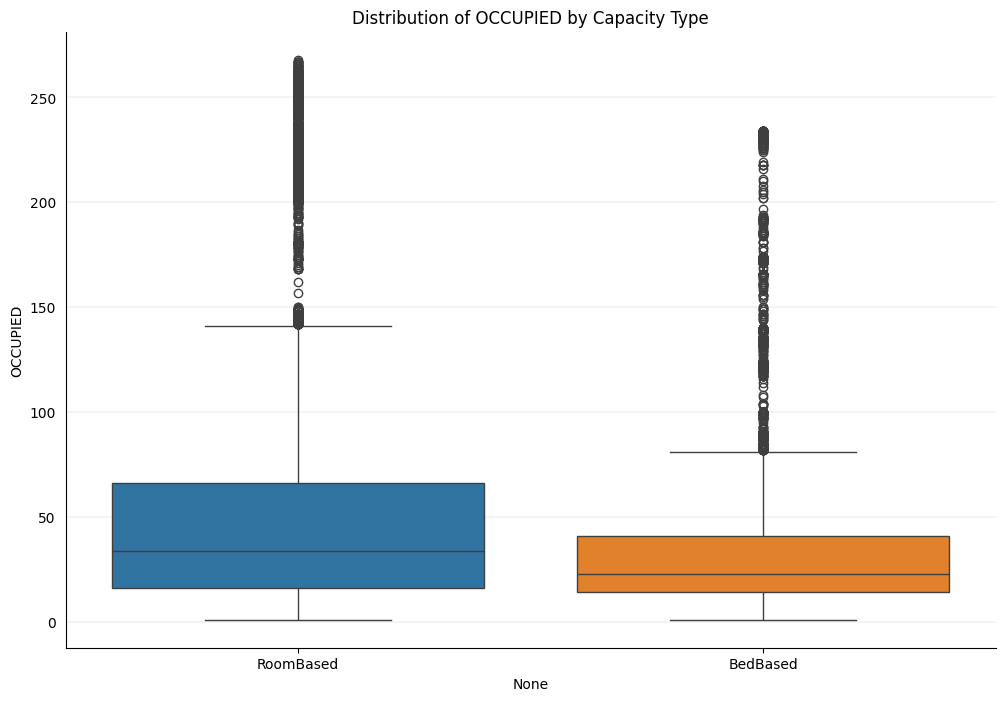

In [46]:
# Plot the multi-variable boxplot for the variable OCCUPIED

fig, ax = plt.subplots(figsize=(12, 8))
# Remove top and right border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position("none")

# Add major gridlines in the y-axis
ax.grid(color="grey", axis="y", linestyle="-", linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title("Distribution of OCCUPIED by Capacity Type")

# Create a boxplot for OCCUPIED
sns.boxplot(x=df_combined.index.get_level_values(0), y="OCCUPIED", data=df_combined, hue=df_combined.index.get_level_values(0), ax=ax)

# Show the plot
plt.show()


In [47]:
# From the previous summary statistics for RoomBased and BedBased, we
# see that the variance for SERVICE_USER_COUNT, CAPACITY_ACTUAL, and
# OCCUPIED between two Capacity Type are not equal, so we can only
# implement Welch's t-test here.

# Perform Welch's t-test for SERVICE_USER_COUNT
t_stat_service_user_count, p_val_service_user_count = stats.ttest_ind(df_RoomBased["SERVICE_USER_COUNT"], df_BedBased["SERVICE_USER_COUNT"], equal_var=False)
print("Welch's t-statistic for SERVICE_USER_COUNT = " + str(t_stat_service_user_count))
print("p-value for SERVICE_USER_COUNT = " + str(p_val_service_user_count))
print("\n")

# Perform Welch's t-test for CAPACITY_ACTUAL
t_stat_capacity_actual, p_val_capacity_actual = stats.ttest_ind(df_RoomBased["CAPACITY_ACTUAL"], df_BedBased["CAPACITY_ACTUAL"], equal_var=False)
print("Welch's t-statistic for CAPACITY_ACTUAL = " + str(t_stat_capacity_actual))
print("p-value for CAPACITY_ACTUAL = " + str(p_val_capacity_actual))
print("\n")

# Perform Welch's t-test for OCCUPIED
t_stat_occupied, p_val_occupied = stats.ttest_ind(df_RoomBased["OCCUPIED"], df_BedBased["OCCUPIED"], equal_var=False)
print("Welch's t-statistic for OCCUPIED = " + str(t_stat_occupied))
print("p-value for OCCUPIED = " + str(p_val_occupied))
print("\n")


Welch's t-statistic for SERVICE_USER_COUNT = 78.50868849938448
p-value for SERVICE_USER_COUNT = 0.0


Welch's t-statistic for CAPACITY_ACTUAL = 51.7986147216613
p-value for CAPACITY_ACTUAL = 0.0


Welch's t-statistic for OCCUPIED = 50.48695539984032
p-value for OCCUPIED = 0.0


